# Task - 4 - To Explore Decision Tree Algorithm.

# Problem Statement

## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is, if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the dataset.

In [4]:
data=pd.read_csv("Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [6]:
data.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data.shape

(150, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
data.groupby('Species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [13]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualising the data

In [17]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

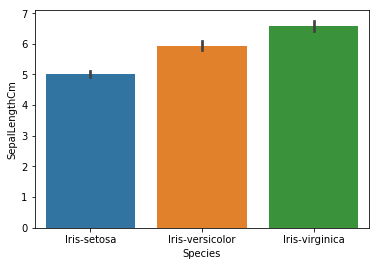

In [18]:
sns.barplot(data['Species'], data['SepalLengthCm'])

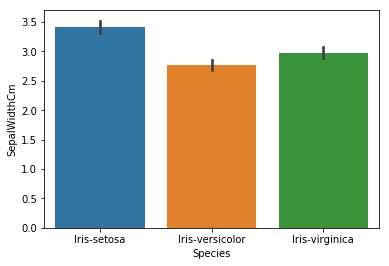

In [19]:
sns.barplot(data['Species'], data['SepalWidthCm'])

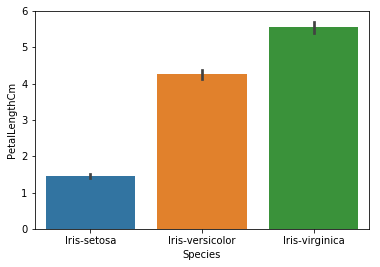

In [20]:
sns.barplot(data['Species'], data['PetalLengthCm'])

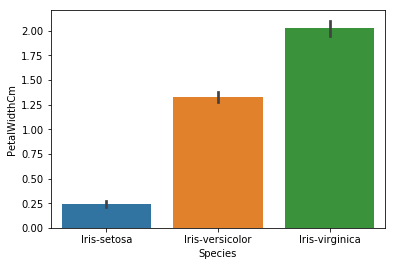

In [21]:
sns.barplot(data['Species'], data['PetalWidthCm'])

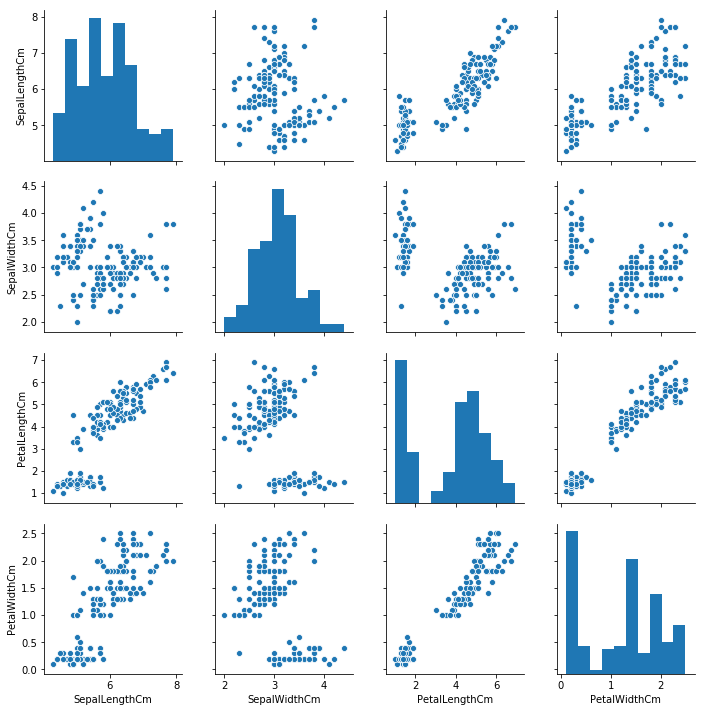

In [22]:
sns.pairplot(data.drop('Id',axis=1))

Text(0.5, 1.0, 'Cluster')

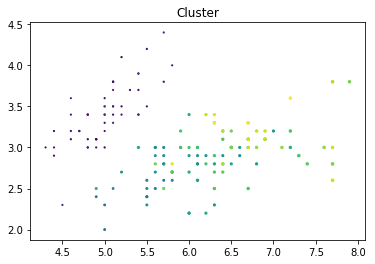

In [23]:
#plotting the data

plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])
plt.title('Cluster')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


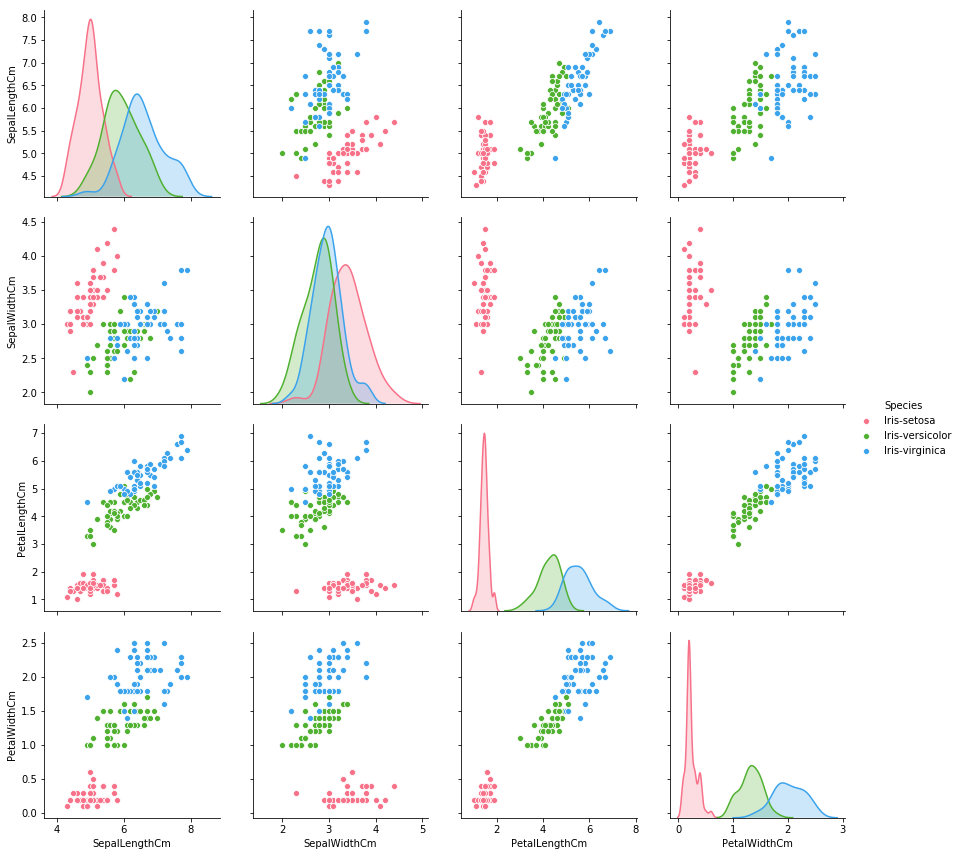

In [24]:
#plotting pair plot for "Species"
sns.pairplot(data.drop('Id',axis=1), hue="Species", palette="husl", size=3, diag_kind='kde')

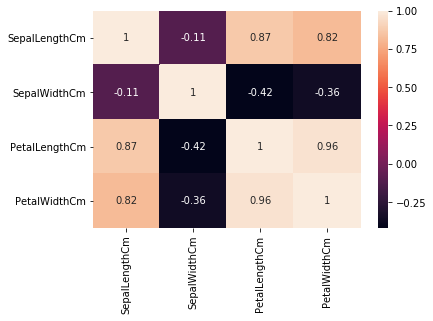

In [25]:
# Correlation Matrix
new_data= data.drop('Id',axis=1)
sns.heatmap(new_data.corr(), annot=True)

# Now we start with the model building

## We Split the data into training and testing

In [26]:
#Taking only required variables
X=new_data.values[:,:-1]#all rows except last column
Y=new_data.values[:,-1]#all rows and -1 denotes last column 

In [27]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

Y=le.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

# Training the model

In [29]:
#predicting using the decision_tree_classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

# Predicting the model

In [30]:
Y_pred=model_DT.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 1 2 2 0 2
 2 2 2 0 0 1 0 1]


In [31]:
#Comparing Actual vs Predicted
Data = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
Data

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


# Evaluating the Model

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print(acc)
print('The Accuracy Of The Model is 97.77%')

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777
The Accuracy Of The Model is 97.77%


# Important Features

In [33]:
colname=new_data.columns
colname

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
print(list(zip(colname,model_DT.feature_importances_))) #it gives us the list of the important features

[('SepalLengthCm', 0.0), ('SepalWidthCm', 0.014297385620915034), ('PetalLengthCm', 0.053115090393711525), ('PetalWidthCm', 0.9325875239853735)]


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


# Visualizing the Tree

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(model_DT,filled = True)

ImportError: cannot import name 'plot_tree' from 'sklearn.tree' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)